## Exercises


<a id='jbe-ex1'></a>

### Exercise 1

Recall that $ n! $ is read as “$ n $ factorial” and defined as
$ n! = n \times (n - 1) \times \cdots \times 2 \times 1 $

In Julia you can compute this value with `factorial(n)`

Write your own version of this function, called `factorial2`, using a `for` loop


<a id='jbe-ex2'></a>

### Exercise 2

The [binomial random variable](https://en.wikipedia.org/wiki/Binomial_distribution) $ Y \sim Bin(n, p) $ represents

- number of successes in $ n $ binary trials  
- each trial succeeds with probability $ p $  


Using only `rand()` from the set of Julia’s built-in random number
generators (not the `Distributions` package), write a function `binomial_rv` such that `binomial_rv(n, p)` generates one draw of $ Y $

Hint: If $ U $ is uniform on $ (0, 1) $ and $ p \in (0,1) $, then the expression `U < p` evaluates to `true` with probability $ p $


<a id='jbe-ex3'></a>

### Exercise 3

Compute an approximation to $ \pi $ using Monte Carlo

For random number generation use only `rand()`

Your hints are as follows:

- If $ U $ is a bivariate uniform random variable on the unit square $ (0, 1)^2 $, then the probability that $ U $ lies in a subset $ B $ of $ (0,1)^2 $ is equal to the area of $ B $  
- If $ U_1,\ldots,U_n $ are iid copies of $ U $, then, as $ n $ gets larger, the fraction that falls in $ B $ converges to the probability of landing in $ B $  
- For a circle, area = π * $ radius^2 $  



<a id='jbe-ex4'></a>

### Exercise 4

Write a program that prints one realization of the following random device:

- Flip an unbiased coin 10 times  
- If 3 consecutive heads occur one or more times within this sequence, pay one dollar  
- If not, pay nothing  


Once again use only `rand()` as your random number generator


<a id='jbe-ex5'></a>

### Exercise 5

Simulate and plot the correlated time series

$$
x_{t+1} = \alpha \, x_t + \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 0
\quad \text{and} \quad t = 0,\ldots,n
$$

The sequence of shocks $ \{\epsilon_t\} $ is assumed to be iid and standard normal

Set $ n = 200 $ and $ \alpha = 0.9 $


<a id='jbe-ex6'></a>

### Exercise 6

Plot three simulated time series, one for each of the cases $ \alpha = 0 $, $ \alpha = 0.8 $ and $ \alpha = 0.98 $

(The figure will illustrate how time series with the same one-step-ahead conditional volatilities, as these three processes have, can have very different unconditional volatilities)


<a id='jbe-ex7'></a>

### Exercise 7

This exercise is more challenging

Take a random walk, starting from $ x_0 = 1 $

$$
x_{t+1} = \, \alpha \, x_t + \sigma\, \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 1
\quad \text{and} \quad t = 0,\ldots,t_{\max}
$$

- Furthermore, assume that the $ x_{t_{\max}} = 0 $  (i.e. at $ t_{\max} $, the value drops to zero, regardless of its current state)  
- The sequence of shocks $ \{\epsilon_t\} $ is assumed to be iid and standard normal  
- For a given path $ \{x_t\} $ define a **first-passage time** as $ T_a = \min\{t\, |\, x_t \leq a\} $, where by the assumption of the process $ T_a \leq t_{\max} $  


Start with $ \sigma = 0.2, \alpha = 1.0 $

1. calculate the first-passage time, $ T_0 $, for 100 simulated random walks – to a $ t_{\max} = 200 $ and plot a histogram  
1. plot the sample mean of $ T_0 $ from the simulation for $ \alpha \in \{0.8, 1.0, 1.2\} $  



<a id='jbe-ex8a'></a>

### Exercise 8(a)

This exercise is more challenging

The root of a univariate function $ f(\cdot) $ is an $ x $ such that $ f(x) = 0 $

One solution method to find local roots of smooth functions is called Newton’s method

Starting with an $ x_0 $ guess, a function $ f(\cdot) $ and the first-derivative $ f'(\cdot) $, the algorithm is to repeat

$$
x^{n+1} = x^n - \frac{f(x^n)}{f'(x^n)}
$$

until $ | x^{n+1} - x^n| $ is below a tolerance

1. Use a variation of the `fixedpointmap` code to implement Newton’s method, where the function would accept arguments `f, f_prime, x_0, tolerance, maxiter`  
1. Test it with $ f(x) = (x-1)^3 $ and another function of your choice where you can analytically find the derivative  

### Exercise 8(b)

For those impatient to use more advanced features of Julia, implement a version of Exercise 8(a) where `f_prime` is calculated with auto-differentiation

In [33]:
using ForwardDiff

# operator to get the derivative of this function using AD
D(f) = x -> ForwardDiff.derivative(f, x)

# example usage: create a function and get the derivative
f(x) = x^2
f_prime = D(f)

f(0.1), f_prime(0.1)

(0.010000000000000002, 0.2)

1. Using the `D(f)` operator definition above, implement a version of Newton’s method that does not require the user to provide an analytical derivative  
1. Test the sorts of `f` functions which can be automatically integrated by `ForwardDff.jl`  

## Solutions

### Exercise 1

In [34]:
function factorial2(n)
    k = 1
    for i in 1:n
        k *= i  # or k = k * i
    end
    return k
end

factorial2(4)

24

In [35]:
factorial2(4) == factorial(4) # built-in function

true

### Exercise 2

In [36]:
function binomial_rv(n, p)
    count = 0
    U = rand(n)
    for i in 1:n
        if U[i] < p
            count += 1 # or count = count + 1
        end
    end
    return count
end

for j in 1:25
    b = binomial_rv(10, 0.5)
    print("$b, ")
end

6, 7, 7, 2, 8, 6, 4, 4, 6, 5, 4, 6, 5, 6, 5, 6, 7, 6, 6, 5, 3, 6, 3, 8, 7, 

### Exercise 3

Consider a circle with diameter 1 embedded in a unit square

Let $ A $ be its area and let $ r = 1/2 $ be its radius

If we know $ \pi $ then we can compute $ A $ via
$ A = \pi r^2 $

But the point here is to compute $ \pi $, which we can do by
$ \pi = A / r^2 $

Summary: If we can estimate the area of the unit circle, then dividing
by $ r^2 = (1/2)^2 = 1/4 $ gives an estimate of $ \pi $

We estimate the area by sampling bivariate uniforms and looking at the
fraction that fall into the unit circle

In [37]:
n = 1000000
count = 0
for i in 1:n
    u, v = rand(2)
    d = sqrt((u - 0.5)^2 + (v - 0.5)^2)  # distance from middle of square
    if d < 0.5
        count += 1
    end
end

area_estimate = count / n

print(area_estimate * 4)  # dividing by radius**2

3.143316

### Exercise 4

In [38]:
payoff = 0
count = 0

print("Count = ")

for i in 1:10
    U = rand()
    if U < 0.5
        count += 1
    else
        count = 0
    end
    print(count)
    if count == 3
        payoff = 1
    end
end
println("\npayoff = $payoff")

Count = 0010000100
payoff = 0


We can simplify this somewhat using the **ternary operator**. Here are
some examples

In [39]:
a = 1  < 2 ? "foo" : "bar"

"foo"

In [40]:
a = 1 > 2 ? "foo" : "bar"

"bar"

Using this construction:

In [41]:
payoff = 0.0
count = 0.0

print("Count = ")

for i in 1:10
    U = rand()
    count = U < 0.5 ? count + 1 : 0
    print(count)
    if count == 3
        payoff = 1
    end
end
println("\npayoff = $payoff")

Count = 0000101001
payoff = 0.0


### Exercise 5

Here’s one solution

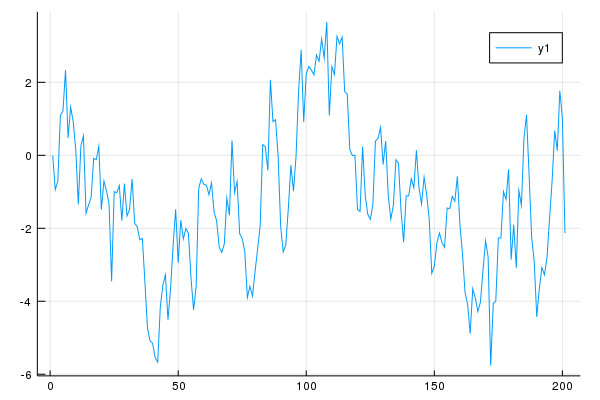

In [42]:
using Plots
gr(fmt=:png); # setting for easier display in jupyter notebooks
α = 0.9
n = 200
x = zeros(n + 1)

for t in 1:n
    x[t+1] = α * x[t] + randn()
end
plot(x)

### Exercise 6

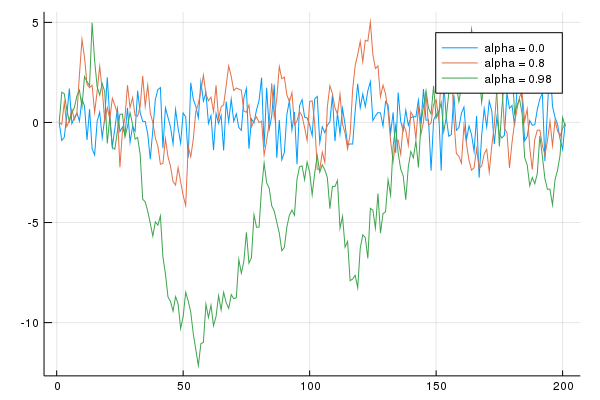

In [43]:
αs = [0.0, 0.8, 0.98]
n = 200
p = plot() # naming a plot to add to

for α in αs
    x = zeros(n + 1)
    x[1] = 0.0
    for t in 1:n
        x[t+1] = α * x[t] + randn()
    end
    plot!(p, x, label = "alpha = $α") # add to plot p
end
p # display plot

### Exercise 7: Hint

As a hint, notice the following pattern for finding the number of draws of a uniform random number until it is below a given threshold

In [44]:
function drawsuntilthreshold(threshold; maxdraws=100)
    for i in 1:maxdraws
        val = rand()
        if val < threshold # checks threshold
            return i # leaves function, returning draw number
        end
    end
    return Inf # if here, reached maxdraws
end

draws = drawsuntilthreshold(0.2, maxdraws=100)

7

Additionally, it is sometimes convenient to add to just push numbers onto an array without indexing it directly

In [45]:
vals = zeros(0) # empty vector

for i in 1:100
    val = rand()
    if val < 0.5
        push!(vals, val)
    end
end
println("There were $(length(vals)) below 0.5")

There were 59 below 0.5
